In [3]:
import networkx as nx
from karateclub import Diff2Vec

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [213]:
def createXY(data, labels):
    data = data.merge(labels, on="node", how="left")
    data = data.drop("node", axis = 1)
    y_cols = data.select_dtypes('uint8').columns
    Y = data[y_cols].values.flatten()
    X = data.drop(y_cols, axis = 1)
    return X,Y


def get_scores(y_true, y_pred):
    return {
        "accuracy" : accuracy_score(y_true, y_pred),
        "precision" : precision_score(y_true, y_pred, average='weighted', zero_division=0),
        "recall" : recall_score(y_true, y_pred, average='weighted', zero_division=0),
        # "roc_auc" : roc_auc_score(y_true, y_pred, multi_class='ovr'),
        "f1_score" : f1_score(y_true, y_pred, average='weighted', zero_division=0),
    }

In [12]:
d = pd.read_table("data/email-eu/email-Eu-core.txt", sep=" ")

In [13]:
d.to_csv("data/email-eu/email-Eu-core.csv",index=False)

In [17]:
g = nx.read_edgelist("data/email-eu/email-Eu-core.txt", nodetype=int, create_using=nx.DiGraph)

## Creating classification tasks

In [97]:
labels = pd.read_table("data/email-eu/email-Eu-core-department-labels.txt", sep=" ", header=None)
labels = labels.rename(columns={0:"node", 1: "community"})
labels['community'] = labels['community'].astype('uint8')

In [43]:
# one_hot = pd.get_dummies(labels[1])
# one_hot.columns = ["com_"+str(s) for s in one_hot.columns]
# labels = labels.drop(1, axis=1).merge(one_hot, left_index=True, right_index=True)

In [155]:
X,Y = createXY(data_di, labels)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## Connected graph

In [214]:
data_con = pd.read_csv("output/email-eu.csv")

In [215]:
X,Y = createXY(data_con, labels)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [217]:
m = LinearSVC(random_state=42, multi_class='ovr')
# m = RandomForestClassifier(random_state=42, max_depth=6)
m.fit(X_train, y_train)

LinearSVC(random_state=42)

In [218]:
y_train_pred = m.predict(X_train)
y_pred = m.predict(X_test)

In [219]:
get_scores(y_train, y_train_pred)

{'accuracy': 0.3333333333333333,
 'precision': 0.5158782560787092,
 'recall': 0.3333333333333333,
 'f1_score': 0.31365253943399923}

In [220]:
get_scores(y_test, y_pred)

{'accuracy': 0.20245398773006135,
 'precision': 0.20247943944262964,
 'recall': 0.20245398773006135,
 'f1_score': 0.14588447809902846}

## Connected graph

In [221]:
data_di = pd.read_csv("output/email-eu-di.csv")

In [222]:
X,Y = createXY(data_di, labels)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [224]:
m = LinearSVC(random_state=42, multi_class='ovr')
m.fit(X_train, y_train)

LinearSVC(random_state=42)

In [225]:
y_train_pred = m.predict(X_train)
y_pred = m.predict(X_test)

In [226]:
get_scores(y_train, y_train_pred)

{'accuracy': 0.23179791976225855,
 'precision': 0.5387480888084932,
 'recall': 0.23179791976225855,
 'f1_score': 0.19892515559487275}

In [227]:
get_scores(y_test, y_pred)

{'accuracy': 0.13253012048192772,
 'precision': 0.08865431243364026,
 'recall': 0.13253012048192772,
 'f1_score': 0.07916559149549758}

# Visual examples

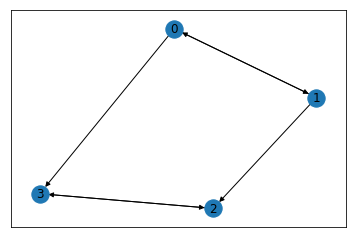

In [25]:
import pandas as pd 
import networkx as nx

graph = nx.from_edgelist(pd.read_csv('/Users/szymonszmajdzinski/Documents/Studia/Magisterskie/MLoG/diff2vec4directed-1/data/test3.csv', index_col=None).values.tolist(), create_using=nx.DiGraph)
nx.draw_networkx(graph)

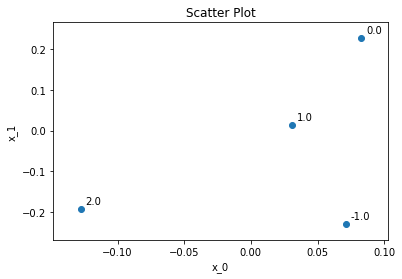

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# read the data from the CSV file into a Pa`ndas DataFrame
df = pd.read_csv('output/test.csv')

# create the scatter plot
plt.scatter(df['x_0'], df['x_1'])
for i, row in df.iterrows():
    plt.annotate(row['node'], xy=(row['x_0'], row['x_1']), xytext=(5, 5), textcoords='offset points')
plt.xlabel('x_0')
plt.ylabel('x_1')
plt.title('Scatter Plot')
plt.show()